<a href="https://colab.research.google.com/github/agu4yh/assignment2/blob/main/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?

This paper is about tidy data, and how to make data cleaning as efficient and easy as possible.

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

"The tidy data standard has been designed to facilitate initial exploration and analysis of the data, and to symplify the developement of data analysis tools that work well together."

  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

The first scentence means that tidy datasets are cleaned to be organized in the same manner, while messy datasets can be organized in a variety of different ways, making them less predictable and difficult to dive into analysis.

  4. Read Section 2.2. How does Wickham define values, variables, and observations?

Values: "usually either numbers (if quantitiative) or strings (if qualitative)."

Variables: "contains all values that measure the same underlying attribute (like height, temperature, duration) across units."

Observations: "contains all values measured on the same unit (like a person, or a day, or a race) across attributes."

  5. How is "Tidy Data" defined in section 2.3?

Tidy data is defined as "the standard way of mapping the meaning of a dataset to it's structure"

  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

The 5 most common problems with messy datasets are when column headers are values and not variable names, multiple variables are stored in one column, variables are stored in both rows and columns, multiple types of observational units are stored in the same table, a single observational unit is stored in multiple tables.

The data in table 4 are messy because they use 3 variables (religion, income and freuency) which are stored in both columns and rows.

"Melting" a dataset is the process of tidying it by turning columns into rows. "Melting is parameterised by a list of columns that are already variables, or colvars for short. The other columns are converted into two variables: a new variable called column that contains repeated column headings and a new variable called value that contains the concatenated data values from the previously separate columns."

  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

Table 11 is messy because it has a column for each instance of a day variable (d1, d2, d3, ... etc.). In contrast, table 12 is tidy because each instance of a variable is within it's column, including the day variables.

  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

The "chicken-and-egg" problem with focusing on tidy data is that "if tidy data is only as useful as the tools that work with it, then tidy tools will be inextricably linked to tidy data. This makes it easy to get stuck in a local maxima where independently changing data structures or data tools will not improve workflow."

In the future, Wickham hopes people will "develop even better data storage strategies and better tools" to futher work on the subject of data wrangling.

**Q2.** This question provides some practice cleaning variables which have common problems.
   1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

To clean 'Price', I chose to remove the "," from all the prices and convert to a float in order to filter through the values easier.  I chose to validate "Price" to make sure all values were acceptable, so I ended up with 0 missing values, which can be seen in the code below. 

In [ ]:
import pandas as pd

# Load the .csv file
df = pd.read_csv('./data/airbnb_hw.csv')

# Remove non-numeric characters and convert to float
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Validate the 'Price' column
print(df['Price'].describe())

# Check for missing values in the 'Price' column
missing_values = df['Price'].isnull().sum()
print("Missing 'Price' values:", missing_values)

# Filter and print values within the specified range
filtered_prices = df[(df['Price'] >= 675) & (df['Price'] <= 1112)]
print(filtered_prices['Price'])

   2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.

I combined types that seemed redundant and could be combined like how we discussed in lecture. I chose to replace 'Questionable', 'Unverified' and 'Under investigation' with 'Unconfirmed' and replaced 'Boating', 'Boat' and 'Boatomg' with 'Watercraft'

In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('./data/sharks.csv')

# Get unique values in the 'Type' column and print
unique_types = df['Type'].unique()
print("\nTypes before cleaning:")
for types in unique_types:
    print(" " + str(types))
   
# Combine several types into the 'Unconfirmed' type
df['Type'].replace({'Questionable': 'Unconfirmed'}, inplace=True)
df['Type'].replace({'Unverified': 'Unconfirmed'}, inplace=True)
df['Type'].replace({'Under investigation': 'Unconfirmed'}, inplace=True)

# Combine several types into the 'Watercraft' type
df['Type'].replace({'Boating': 'Watercraft'}, inplace=True)
df['Type'].replace({'Boat': 'Watercraft'}, inplace=True)
df['Type'].replace({'Boatomg': 'Watercraft'}, inplace=True)

# Get unique values in the 'Type' column and print
unique_types = df['Type'].unique()
print("\nTypes after cleaning:")
for types in unique_types:
    print(" " + str(types))

   3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
   
I found no missing values initially, but the 9 was a value that didn't make sense in the context of the problem so I used it as the "missing value". That's why I chose to replaced all instances of 9 with 'np.nan'.

In [20]:
import pandas as pd
import numpy as np

url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)

unique_types = df["WhetherDefendantWasReleasedPretrial"].unique()
for types in unique_types:
    print(types)

missing_values = df['WhetherDefendantWasReleasedPretrial'].isna().sum() 
print("number of missing values:", missing_values)

# Replace missing values with np.nan
df['WhetherDefendantWasReleasedPretrial'].replace(9, np.nan, inplace=True)

unique_types = df["WhetherDefendantWasReleasedPretrial"].unique()
for types in unique_types:
    print(types)

9
0
1
number of missing values: 0
nan
0.0
1.0


   4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

I changed all the missing values to 0 and rounded all of the variables in order to mock the structure of the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.

In [44]:
import pandas as pd
import numpy as np

url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)

# the output is very long so I commented it out
#unique_types = df["ImposedSentenceAllChargeInContactEvent"].unique()
#for types in unique_types:
#    print(types)
    
#print('\n\n\n')
unique_types = df["SentenceTypeAllChargesAtConvictionInContactEvent"].unique()
for types in unique_types:
    print(types)
    
empty_cells_count = df['ImposedSentenceAllChargeInContactEvent'].isna().sum()
print("Total number of empty cells:", empty_cells_count)

# Replace empty cells with NaN
df['ImposedSentenceAllChargeInContactEvent'] = df['ImposedSentenceAllChargeInContactEvent'].replace('', 0)

# Convert the column to numeric
df['ImposedSentenceAllChargeInContactEvent'] = pd.to_numeric(df['ImposedSentenceAllChargeInContactEvent'], errors='coerce')

# Round the numeric values
df['ImposedSentenceAllChargeInContactEvent'] = df['ImposedSentenceAllChargeInContactEvent'].round(0)


9
0
1
4
2
Total number of empty cells: 0


**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

   1. Load the `./data/college_completion.csv` data with Pandas.
   2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
   3. Cross tabulate `control` and `level`. Describe the patterns you see.

The pattern I noticed is that more private colleges seem to be at a 4-year level while more public colleges seem to be at a 2-year level.

In [50]:
import pandas as pd

#PART 1:
# Load the data
data = pd.read_csv('./data/college_completion.csv')

#PART 2:
# Check the dimensions of the data
print("Dimensions of the data: ", data.shape)

# Get the number of observations
num_obs = data.shape[0]
print("Number of observations: ", num_obs)

# List the variables included
vars_included = data.columns.tolist()
print("Variables included: ", vars_included)

# Examine the first few rows of data using .head()
print(data.head())

#PART 3:
# Cross-tabulate control and level
cross_tabulate = pd.crosstab(data['control'], data['level'])
print(cross_tabulate)

#PART 4:


Dimensions of the data:  (3798, 63)
Number of observations:  3798
Variables included:  ['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count', 'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value', 'grad_100_percentile', 'grad_150_value', 'grad_150_percentile', 'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile', 'ft_fac_value', 'ft_fac_percentile', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_af

   4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
   5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
   
In the kernel density plot grouped by `control`, I noticed that the density of public and private for-profit colleges decrease relatively exponentially as the grad_100_value increases while the private not-for-profit's density spikes and decreases within a density range of 0-0.2. In the kernel density plot grouped by `level`, I noticed that the density of the 2-year level starts relatively high and drops in an exponential pattern as the grad_100_value increases while the 4-year level starts at around half the density of the 2-year level and decreases relatively linearly as the grad_100_value increases. 

The private (mainly not-for-profit) institutions with a 4-year level apprear to have better graduation rates.

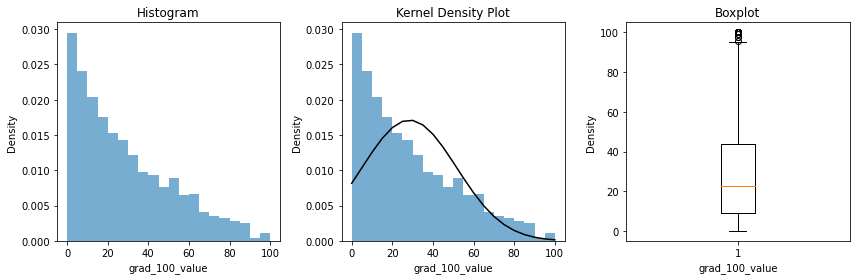

Statistical Description of grad_100_value:
count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


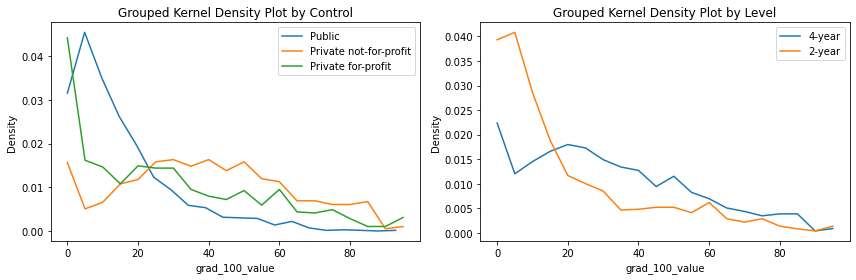

Grouped Statistical Description of grad_100_value by Control:
                         count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  

Grouped Statistical Description of grad_100_value by Level:
         count       mean        std  min   25%   50%     75%    max
level                                                               
2-year  1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year  2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0


In [57]:
import matplotlib.pyplot as plt
import numpy as np

#PART 4:

# Filter out missing values in grad_100_value
grad_filtered = data['grad_100_value'].dropna()

# Histogram
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.hist(grad_filtered, bins=20, density=True, alpha=0.6)
plt.title('Histogram')
plt.xlabel('grad_100_value')  
plt.ylabel('Density')

# Kernel density plot
plt.subplot(132)
density, bins, _ = plt.hist(grad_filtered, bins=20, density=True, alpha=0.6)
plt.plot(bins, np.exp(-((bins - grad_filtered.mean())**2) / (2 * grad_filtered.std()**2)) / (grad_filtered.std() * np.sqrt(2 * np.pi)), 'k')
plt.title('Kernel Density Plot')
plt.xlabel('grad_100_value')  
plt.ylabel('Density')

# Boxplot
plt.subplot(133)
plt.boxplot(grad_filtered)
plt.title('Boxplot')
plt.xlabel('grad_100_value')  
plt.ylabel('Density')
plt.tight_layout()
plt.show()

# Statistical description
grad_stats = grad_filtered.describe()
print("Statistical Description of grad_100_value:")
print(grad_stats)

#PART 5:

# Grouped kernel density plot by control
plt.figure(figsize=(12, 4))
plt.subplot(121)
for control in data['control'].unique():
    control_data = grad_filtered[data['control'] == control]
    density, bins = np.histogram(control_data, bins=20, density=True)
    plt.plot(bins[:-1], density, label=control)
plt.legend()
plt.title('Grouped Kernel Density Plot by Control')
plt.xlabel('grad_100_value') 
plt.ylabel('Density')        

# Grouped kernel density plot by level
plt.subplot(122)
for level in data['level'].unique():
    level_data = grad_filtered[data['level'] == level]
    density, bins = np.histogram(level_data, bins=20, density=True)
    plt.plot(bins[:-1], density, label=level)
plt.legend()
plt.title('Grouped Kernel Density Plot by Level')
plt.xlabel('grad_100_value') 
plt.ylabel('Density')   

plt.tight_layout()
plt.show()

# Grouped statistical description by control
control_group = grad_filtered.groupby(data['control']).describe()
print("Grouped Statistical Description of grad_100_value by Control:")
print(control_group)

# Grouped statistical description by level
level_group = grad_filtered.groupby(data['level']).describe()
print("\nGrouped Statistical Description of grad_100_value by Level:")
print(level_group)

   6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
   
Private not-for profit institutions of the 2-year and 4-year levels appear to have better graduation rates.
   
   7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
   
Besides the Private not-for-profit 4-year institution, the other institution types generally peak at an aid value around 50000, which explains the bi-mo9dal nature of the graph.
   
   8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?
   
For the scatterplot of `grad_100_value` by `aid_value`, I noticed that lower aid_value generally corresponds to a lower grad_100_value. As the aid_value increases, the grad_100_values increases but in sparcity. 
Aid seems to increase graduation rates for 4-year, private not-for-profit institutions.

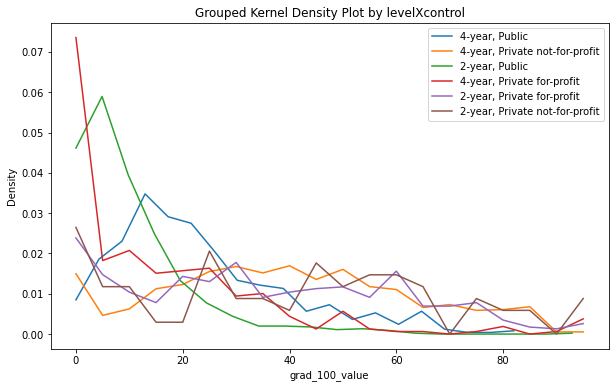

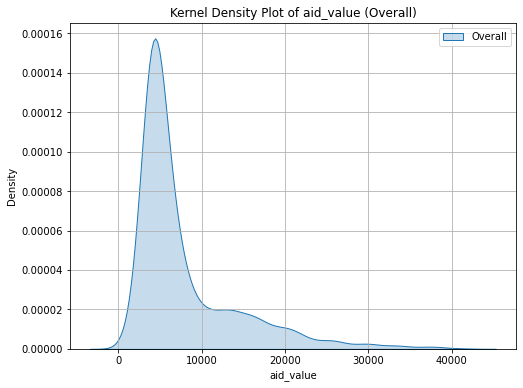

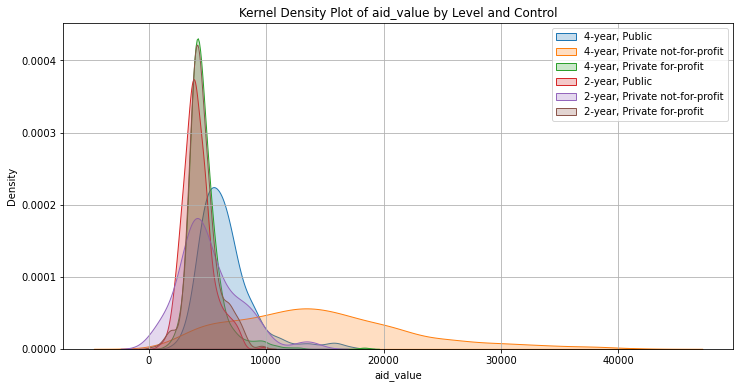

Grouped Statistical Description of aid_value by Level and Control:
                                count          mean          std     min  \
level  control                                                             
2-year Private for-profit       464.0   4559.681034  1286.688269   294.0   
       Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
       Public                   926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit       527.0   4696.062619  1489.410020  1580.0   
       Private not-for-profit  1180.0  14702.401695  7649.775203   902.0   
       Public                   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
level  control                                                      
2-year Private for-profit      3818.75   4286.5   5122.00   9727.0  
       Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
       Public                  3311.25   3943.5 

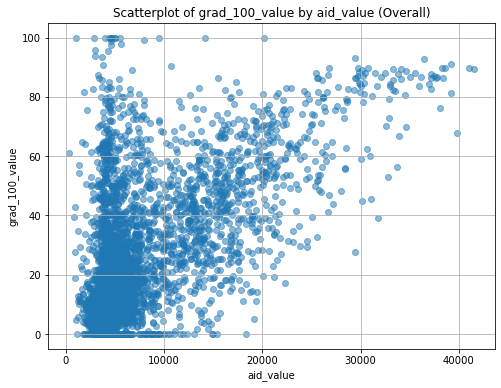

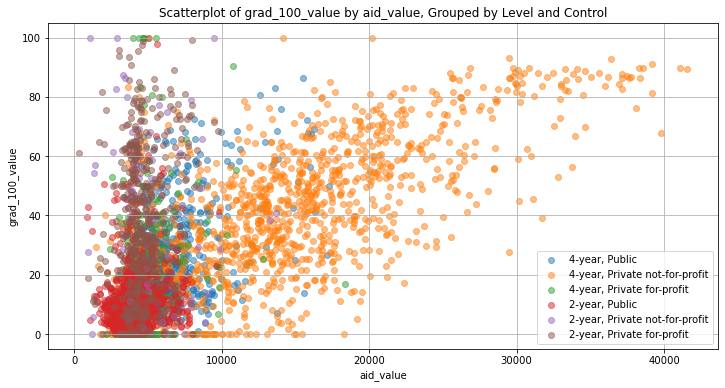

In [64]:
import matplotlib.pyplot as plt
import numpy as np
#PART 6:

# Load the data
data = pd.read_csv('./data/college_completion.csv')

# Filter out missing values in grad_100_value
grad_filtered = data['grad_100_value'].dropna()  

data['levelXcontrol'] = data['level'] + ', ' + data['control']

# Grouped kernel density plot by 'levelXcontrol'
plt.figure(figsize=(10, 6))
for level_control_group in data['levelXcontrol'].unique():
    group_data = grad_filtered[data['levelXcontrol'] == level_control_group]
    density, bins = np.histogram(group_data, bins=20, density=True)
    plt.plot(bins[:-1], density, label=level_control_group)

plt.legend()
plt.title('Grouped Kernel Density Plot by levelXcontrol')
plt.xlabel('grad_100_value')
plt.ylabel('Density')
plt.show()

#PART 7:

# Create a kernel density plot of aid_value
plt.figure(figsize=(8, 6))
plt.title('Kernel Density Plot of aid_value (Overall)')
plt.xlabel('aid_value')
plt.ylabel('Density')

sns.kdeplot(data['aid_value'], shade=True, label='Overall')
plt.legend()
plt.grid(True)

plt.show()

# Grouped kernel density plot by level and control
plt.figure(figsize=(12, 6))
plt.title('Kernel Density Plot of aid_value by Level and Control')
plt.xlabel('aid_value')
plt.ylabel('Density')
plt.grid(True)

for level in data['level'].unique():
    for control in data['control'].unique():
        subset = data[(data['level'] == level) & (data['control'] == control)]
        if len(subset) > 0:
            sns.kdeplot(subset['aid_value'], shade=True, label=f'{level}, {control}')

plt.legend()
plt.show()

# Grouped statistical description by level and control
grouped_stats = data.groupby(['level', 'control'])['aid_value'].describe()
print("Grouped Statistical Description of aid_value by Level and Control:")
print(grouped_stats)

#PART 8:

# Scatterplot of grad_100_value by aid_value
plt.figure(figsize=(8, 6))
plt.title('Scatterplot of grad_100_value by aid_value (Overall)')
plt.xlabel('aid_value')
plt.ylabel('grad_100_value')

plt.scatter(data['aid_value'], data['grad_100_value'], alpha=0.5)
plt.grid(True)
plt.show()

# Scatterplot of grad_100_value by aid_value, grouped by level then control
plt.figure(figsize=(12, 6))
plt.title('Scatterplot of grad_100_value by aid_value, Grouped by Level and Control')
plt.xlabel('aid_value')
plt.ylabel('grad_100_value')

for level in data['level'].unique():
    for control in data['control'].unique():
        subset = data[(data['level'] == level) & (data['control'] == control)]
        if len(subset) > 0:
            plt.scatter(subset['aid_value'], subset['grad_100_value'], label=f'{level}, {control}', alpha=0.5)

plt.legend()
plt.grid(True)
plt.show()

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.